In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import sklearn.cluster as cluster

from Funciones import Explorer

In [2]:
DATA_DIR="/home/grupodot/Documentos/Examen_globant/Purchase-Card-Transactions_GLBNT_TESTT/Data/"

In [3]:
expl = Explorer()
df_f = expl.clean_import(DATA_DIR)
print("La dimension de la base es: ", df_f.shape)
df_f.describe()

La dimension de la base es:  (47803, 12)


,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,BILLING CUR CODE,Unnamed: 10
count,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,4.571261,158.331458,2297.651905,552.437169,51.877163,54.656967,388.251951,466.267473,0.244211,7.130891,0.278978,9.617304
std,1.550038,1958.036331,1905.590212,304.734431,21.694383,31.078966,250.273340,264.175416,2.062509,3.287610,0.448502,1.439584
min,0.000000,-6794.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,12.700000,289.000000,299.000000,35.000000,28.000000,179.000000,228.000000,0.000000,6.000000,0.000000,10.000000
50%,6.000000,39.980000,1969.000000,572.000000,55.000000,58.000000,280.000000,432.000000,0.000000,6.000000,0.000000,10.000000
75%,6.000000,85.000000,4162.000000,815.000000,60.000000,84.000000,679.000000,717.000000,0.000000,11.000000,1.000000,10.000000
max,7.000000,106289.880000,5986.000000,1060.000000,105.000000,105.000000,911.000000,904.000000,25.000000,13.000000,1.000000,10.000000


In [4]:
scaler=StandardScaler()
scaler.fit(df_f)
scaled_data=scaler.transform(df_f)
df_f2 = pd.DataFrame(data=scaled_data, columns=df_f.columns)
df_f2.describe()

,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate,BILLING CUR CODE,Unnamed: 10
count,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04,4.780300e+04
mean,3.127381e-16,8.918387e-18,9.929137e-17,3.626811e-17,5.945591e-19,-8.086004e-17,-1.189118e-17,1.040478e-16,-6.837430e-18,-4.756473e-17,-3.329531e-17,5.707768e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.949159e+00,-3.550702e+00,-1.205756e+00,-1.812867e+00,-2.391297e+00,-1.758667e+00,-1.551328e+00,-1.765010e+00,-1.184058e-01,-2.169043e+00,-6.220296e-01,-6.680683e+00
25%,-1.013702e+00,-7.437706e-02,-1.054095e+00,-8.316744e-01,-7.779589e-01,-8.577263e-01,-8.361024e-01,-9.019384e-01,-1.184058e-01,-3.439895e-01,-6.220296e-01,2.658404e-01
50%,9.217537e-01,-6.044459e-02,-1.724691e-01,6.419700e-02,1.439483e-01,1.075669e-01,-4.325394e-01,-1.297162e-01,-1.184058e-01,-3.439895e-01,-6.220296e-01,2.658404e-01
75%,9.217537e-01,-3.745192e-02,9.783675e-01,8.616210e-01,3.744251e-01,9.441543e-01,1.161734e+00,9.491237e-01,-1.184058e-01,1.176888e+00,1.607641e+00,2.658404e-01
max,1.566906e+00,5.420362e+01,1.935561e+00,1.665608e+00,2.448716e+00,1.619860e+00,2.088730e+00,1.656994e+00,1.200288e+01,1.785239e+00,1.607641e+00,2.658404e-01


In [5]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters= i, max_iter= 500)
    kmeans.fit(df_f2)
    wcss.append(kmeans.inertia_)

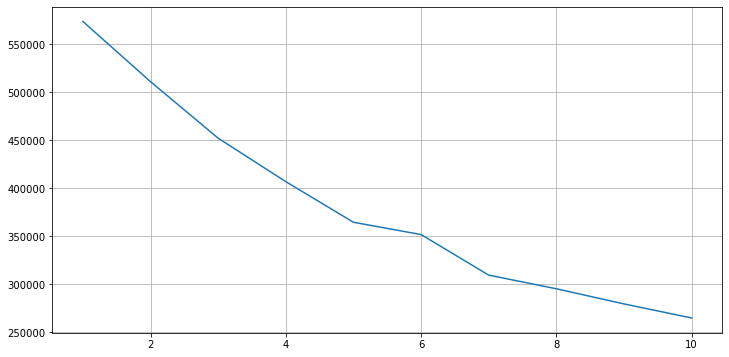

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), wcss)
plt.grid()

In [75]:
for i in range(2,8):
    labels = cluster.KMeans(n_clusters=i, init ="k-means++").fit(df_f2).labels_
    print( "Valor de Silhouette = " + str(i) +" "
          + str(metrics.silhouette_score(df_f2, labels, metric ="euclidean")))


Valor de Silhouette = 2 0.133787503593863
Valor de Silhouette = 3 0.15599566541760526
Valor de Silhouette = 4 0.1667878483285557
Valor de Silhouette = 5 0.16293036902977362
Valor de Silhouette = 6 0.16148449154373543
Valor de Silhouette = 7 0.1790200363334765


In [131]:
df_kmeans3 = df_f2.copy()

clustering3 = KMeans(n_clusters = 3, max_iter = 100000)
clustering3.fit(df_f2)

df_kmeans3["KMeans_cluster"] = clustering3.labels_

KMeans(max_iter=100000, n_clusters=3)

In [133]:
pca3=PCA(n_components=2)
pca3.fit(df_f2)
x3_pca=pca3.transform(df_f2)

No handles with labels found to put in legend.


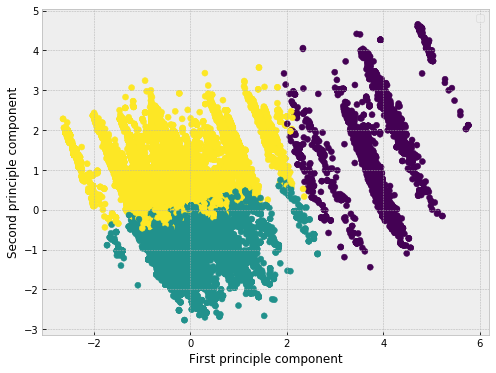

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x3_pca[:,0],x3_pca[:,1], c = df_kmeans3["KMeans_cluster"])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

In [118]:
df_kmeans7 = df_f2.copy()

clustering7 = KMeans(n_clusters = 7, max_iter = 100000)
clustering7.fit(df_f2)

df_kmeans7["KMeans_cluster"] = clustering7.labels_

KMeans(max_iter=100000, n_clusters=7)

In [120]:
pca7=PCA(n_components=2)
pca7.fit(df_f2)
x7_pca=pca7.transform(df_f2)

No handles with labels found to put in legend.


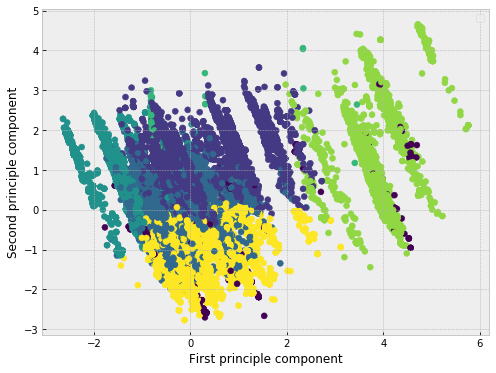

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(x7_pca[:,0],x7_pca[:,1],c=df_kmeans7["KMeans_cluster"])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

In [138]:
g1 = df_kmeans3[df_kmeans3["KMeans_cluster"]==0]
g2 = df_kmeans3[df_kmeans3["KMeans_cluster"]==1]
g3 = df_kmeans3[df_kmeans3["KMeans_cluster"]==2]

columnsg = df_kmeans3.columns

In [143]:
def comparador (variable, df1, df2, df3):
    mnd1 = min(df1[variable])
    mxd1 = max(df1[variable])
    mnd2 = min(df2[variable])
    mxd2 = max(df2[variable])
    mnd3 = min(df3[variable])
    mxd3 = max(df3[variable])
    
    minimo=min(mnd1, mnd2, mnd3)
    maximo= max(mxd1, mxd2, mxd3)
    
    plt.style.use('bmh')
    plt.hist(df1[variable], histtype="stepfilled", bins=15, alpha=0.8, density=True, range=(minimo-1, maximo+1), label=0)
    plt.hist(df2[variable], histtype="stepfilled", bins=15, alpha=0.8, density=True, range=(minimo-1, maximo+1), label=1)
    plt.hist(df3[variable], histtype="stepfilled", bins=15, alpha=0.8, density=True, range=(minimo-1, maximo+1), label=2)

    plt.legend()
    plt.title(variable)
    return plt.show()

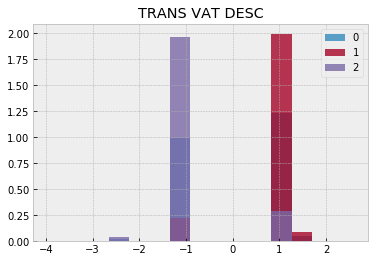

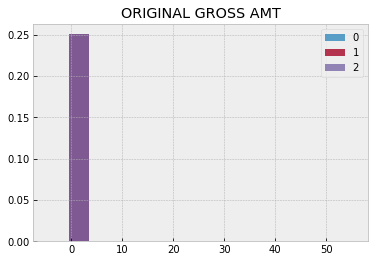

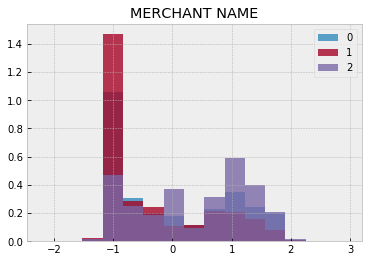

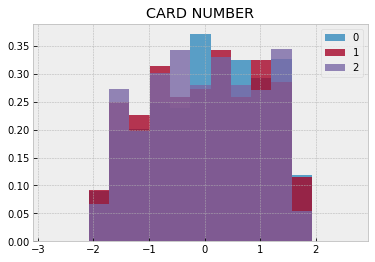

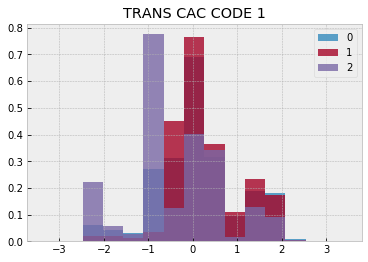

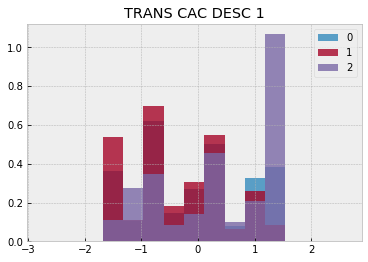

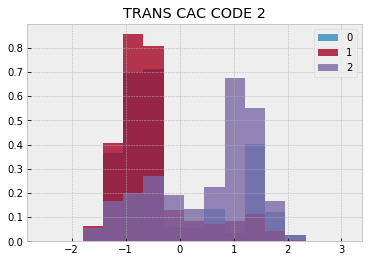

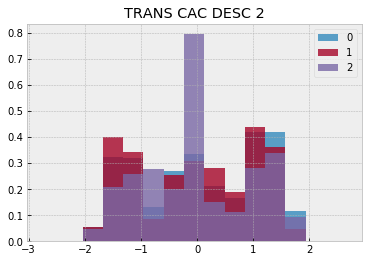

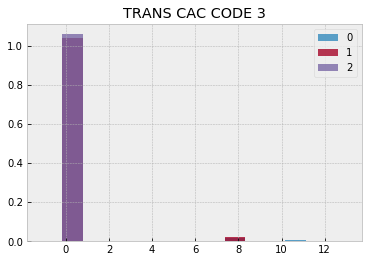

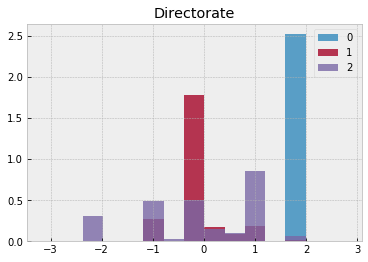

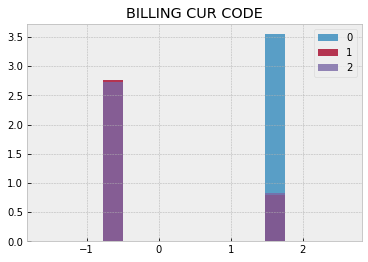

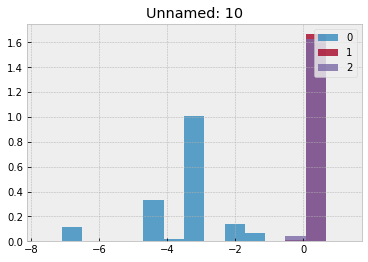

In [144]:
plt.subplot()
for i in range(len(columnsg)-1):
    comparador(columnsg[i], g1, g2, g3)

### Concluciones
Debido a la ausencia de un diccionario, no es posible entender completamente los fenomenos de agrupacion de los usuarios. Sin embargo, con lo encontrado en la exploracion y el analisis de las 3 agrupaciones pricnipales es pocible mencionar las variables que permiten mayor diferenciacion entre grupos.

1. La primera variable, entre las que mas diferenciacion muestran para cada grupo, es la variable "TRANS VAT DESC". Esta bariable puede hacer referencia a un segmento con mayor indices de descuento que los otros dos, asi pues permite diferenciar con importante claridad al gripo 2 del grupo 1.

2. Quiza la variable de mayor diferenciacion en todo el espectro de las variables encontradas, la bariable "TRANS CAC CODE 3". Esta variable es capaz de invertir completamente el comportamiento de la distribucion para el grupo 2 con respecto al grupo 0y grupo 1, esta variable señala unas 25 salidas diferentes, sin embargo o fue posible encontrar a que corresponde cada una. 

3. Una variable que permite hacer un alto grado de diferenciacion para separar al grupo 0 del 1, pues en las otras variables ambos suelen comportarse muy parecido, es la variable "Directorate". Esta cyuenta consalidas como Schools, Adult & Comumunities y developments, entre otros... y quiza sea un claro diferenciador entre edades o perfilamientos de clientes

4. Nota: Algunas variables como unnamed permiten diferenciar de manera importante algunos clientes pues estas variables (vease la exploracion) contienen mayor numero de Nan a partir del 2015. Esto puede indicar la permanencia o antiguedad de un cliente en el servicio.